# Clustering results of scPI-based methods (Cortex)

In [15]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import time
from scPI import scPI_FA
from scPI import scPI_ZIFA
from scPI import scPI_ZINB
from utils import *
from sklearn.decomposition import FactorAnalysis
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score as NMI
from sklearn.metrics import adjusted_rand_score as ARI
def cluster_scores(latent_space, K, labels_true):
    labels_pred = KMeans(K, n_jobs=8, n_init=20).fit_predict(latent_space)
    return [silhouette_score(latent_space, labels_true), NMI(labels_true, labels_pred), ARI(labels_true, labels_pred)]
n_celltype = 7
n_repeat = 10
c_train = np.loadtxt("/Users/jiazhao/Downloads/Results/label_train")

### example of performing scPI-FA, scPI-ZIFA, scPI-ZINB (vary n_epoch and linearity)

When evaluating the impact of the number of epochs, we vary n_epoch to be $\{250,500,10000\}$. When evaluating the impact of the linearity and non-linearity, we vary non_linear to be False or True. We repeat the experiments ten times to draw boxplots.

In [ ]:
np.random.seed(1234)
torch.manual_seed(1234)
file_name = "scPI_FA"
for i in range(n_repeat):
    result, result_test = scPI_FA.fitModel(Y=expression_train, K=10, batch_size=128, n_epoch=500, lr=5e-4, non_linear=True, Y_test=expression_test)
    scores = cluster_scores(result["latent"], n_celltype, c_train)
    np.savetxt(str(i) + file_name + '_scores.txt', scores)

In [ ]:
np.random.seed(1234)
torch.manual_seed(1234)
file_name = "scPI_ZIFA"
for i in range(n_repeat):
    result, result_test = scPI_ZIFA.fitModel(Y=expression_train, K=10, batch_size=128, n_epoch=500, lr=5e-4, non_linear=True, Y_test=expression_test)
    scores = cluster_scores(result["latent"], n_celltype, c_train)
    np.savetxt(str(i) + file_name + '_scores.txt', scores)

In [ ]:
np.random.seed(1234)
torch.manual_seed(1234)
file_name = "scPI_ZINB"
for i in range(n_repeat):
    result, result_test = scPI_ZINB.fitModel(Y=expression_train, K=10, batch_size=128, n_epoch=500, lr=5e-4, non_linear=True, Y_test=expression_test)
    scores = cluster_scores(result["latent"], n_celltype, c_train)
    np.savetxt(str(i) + file_name + '_scores.txt', scores)

### Impact of the number of epochs on clustering scores

In [16]:
n_repeat = 10
models_plot = []
asw_plot = []
nmi_plot = []
ari_plot = []
file_models = ["/Users/jiazhao/Downloads/Results/Cortex/FA/", \
               "/Users/jiazhao/Downloads/Results/Cortex/scPI_FA/10K/", \
               "/Users/jiazhao/Downloads/Results/Cortex/scPI_FA/500/", \
               "/Users/jiazhao/Downloads/Results/Cortex/scPI_FA/250/"]
name_models = ["CORTEX_FA_scores.txt", \
               "_CORTEX_FAVAE_nonlinear_scores.txt", \
               "_CORTEX_FAVAE_nonlinear_scores.txt", \
               "_CORTEX_FAVAE_nonlinear_scores.txt"]
models = ["FA", "scPI-FA-10K", "scPI-FA-500", "scPI-FA-250"]
for i in range(len(name_models)):
    for j in range(n_repeat):
        res = np.loadtxt(str(file_models[i]) + str(j) + str(name_models[i]))
        asw_plot.append(res[0])
        nmi_plot.append(res[1])
        ari_plot.append(res[2])
        models_plot.append(models[i])

res = np.loadtxt("/Users/jiazhao/Downloads/Results/Cortex/ZIFA/CORTEX_ZIFA_scores.txt")
for j in range(n_repeat):
    asw_plot.append(res[0])
    nmi_plot.append(res[1])
    ari_plot.append(res[2])
    models_plot.append("ZIFA")

file_models = ["/Users/jiazhao/Downloads/Results/Cortex/scPI_ZIFA/10K/", \
               "/Users/jiazhao/Downloads/Results/Cortex/scPI_ZIFA/500/", \
               "/Users/jiazhao/Downloads/Results/Cortex/scPI_ZIFA/250/"]
name_models = ["_CORTEX_ZIFAVAE_nonlinear_scores.txt", \
               "_CORTEX_ZIFAVAE_nonlinear_scores.txt", \
               "_CORTEX_ZIFAVAE_nonlinear_scores.txt"]
models = ["scPI-ZIFA-10K", "scPI-ZIFA-500", "scPI-ZIFA-250"]
for i in range(len(name_models)):
    for j in range(n_repeat):
        res = np.loadtxt(str(file_models[i]) + str(j) + str(name_models[i]))
        asw_plot.append(res[0])
        nmi_plot.append(res[1])
        ari_plot.append(res[2])
        models_plot.append(models[i])

for j in range(n_repeat):
    res = np.loadtxt("/Users/jiazhao/Downloads/Results/Cortex/ZINB/" + str(j) + "CORTEX_ZIFA_scores.txt")
    asw_plot.append(res[0])
    nmi_plot.append(res[1])
    ari_plot.append(res[2])
    models_plot.append("ZINB")
    
file_models = ["/Users/jiazhao/Downloads/Results/Cortex/scPI_ZINB/10K/", \
               "/Users/jiazhao/Downloads/Results/Cortex/scPI_ZINB/500/", \
               "/Users/jiazhao/Downloads/Results/Cortex/scPI_ZINB/250/"]
name_models = ["_CORTEX_ZINBVAE_nonlinear_scores.txt", \
               "_CORTEX_ZINBVAE_nonlinear_scores.txt", \
               "_CORTEX_ZINBVAE_nonlinear_scores.txt"]
models = ["scPI-ZINB-10K", "scPI-ZINB-500", "scPI-ZINB-250"]
for i in range(len(name_models)):
    for j in range(n_repeat):
        res = np.loadtxt(str(file_models[i]) + str(j) + str(name_models[i]))
        asw_plot.append(res[0])
        nmi_plot.append(res[1])
        ari_plot.append(res[2])
        models_plot.append(models[i])

In [17]:
model = models_plot + models_plot + models_plot
score = list("ASW" for _ in range(len(asw_plot))) + \
        list("NMI" for _ in range(len(asw_plot))) + \
        list("ARI" for _ in range(len(asw_plot)))
value = asw_plot + nmi_plot + ari_plot

Text(0.5,1,'ASW (Cortex)')

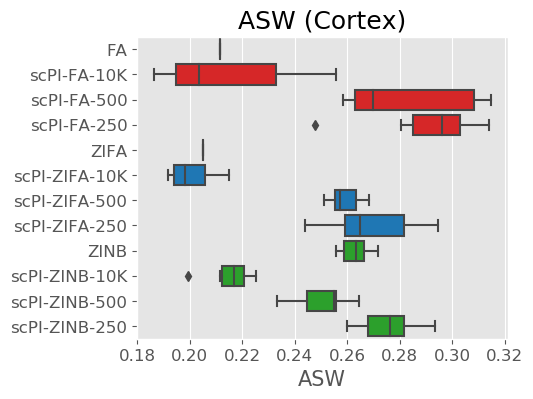

In [18]:
# ASW
model = models_plot
score = list("ASW" for _ in range(len(asw_plot)))
value = asw_plot
d = {'model': model, 'score': score, 'value': value}
df = pd.DataFrame(data=d)
fig = plt.figure(dpi=100)
grid = plt.GridSpec(1, 10, wspace=0.2, hspace=0.2)
ax = plt.subplot(grid[:, 2:10])
sns.boxplot(y="model", x="value", data=df)
ax.artists[0].set_facecolor('tab:red')
ax.artists[1].set_facecolor('tab:red')
ax.artists[2].set_facecolor('tab:red')
ax.artists[3].set_facecolor('tab:red')
ax.artists[4].set_facecolor('tab:blue')
ax.artists[5].set_facecolor('tab:blue')
ax.artists[6].set_facecolor('tab:blue')
ax.artists[7].set_facecolor('tab:blue')
ax.artists[8].set_facecolor('tab:green')
ax.artists[9].set_facecolor('tab:green')
ax.artists[10].set_facecolor('tab:green')
ax.artists[11].set_facecolor('tab:green')
plt.xlabel('ASW', fontsize=15)
plt.ylabel('', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('ASW (Cortex)', fontsize=18)

Text(0.5,1,'NMI (Cortex)')

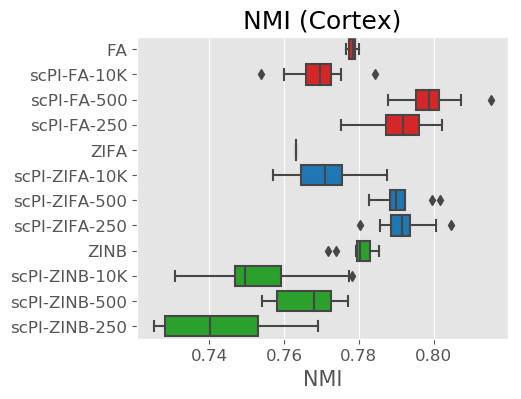

In [19]:
# NMI
model = models_plot
score = list("NMI" for _ in range(len(asw_plot)))
value = nmi_plot
d = {'model': model, 'score': score, 'value': value}
df = pd.DataFrame(data=d)
fig = plt.figure(dpi=100)
grid = plt.GridSpec(1, 10, wspace=0.2, hspace=0.2)
ax = plt.subplot(grid[:, 2:10])
sns.boxplot(y="model", x="value", data=df)
ax.artists[0].set_facecolor('tab:red')
ax.artists[1].set_facecolor('tab:red')
ax.artists[2].set_facecolor('tab:red')
ax.artists[3].set_facecolor('tab:red')
ax.artists[4].set_facecolor('tab:blue')
ax.artists[5].set_facecolor('tab:blue')
ax.artists[6].set_facecolor('tab:blue')
ax.artists[7].set_facecolor('tab:blue')
ax.artists[8].set_facecolor('tab:green')
ax.artists[9].set_facecolor('tab:green')
ax.artists[10].set_facecolor('tab:green')
ax.artists[11].set_facecolor('tab:green')
plt.xlabel('NMI', fontsize=15)
plt.ylabel('', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('NMI (Cortex)', fontsize=18)
# plt.savefig("cortex-nmi-10K.pdf", dpi=100)

Text(0.5,1,'ARI (Cortex)')

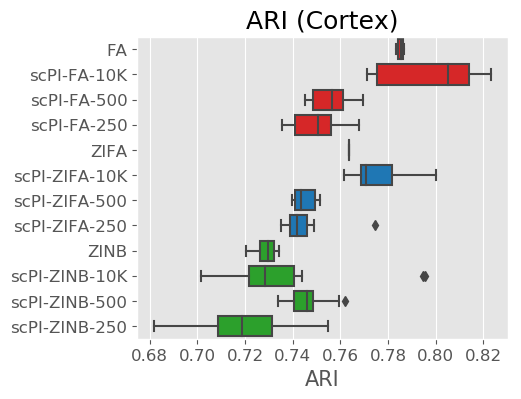

In [20]:
# ARI
model = models_plot
score = list("ARI" for _ in range(len(asw_plot)))
value = ari_plot
d = {'model': model, 'score': score, 'value': value}
df = pd.DataFrame(data=d)
fig = plt.figure(dpi=100)
grid = plt.GridSpec(1, 10, wspace=0.2, hspace=0.2)
ax = plt.subplot(grid[:, 2:10])
sns.boxplot(y="model", x="value", data=df)
ax.artists[0].set_facecolor('tab:red')
ax.artists[1].set_facecolor('tab:red')
ax.artists[2].set_facecolor('tab:red')
ax.artists[3].set_facecolor('tab:red')
ax.artists[4].set_facecolor('tab:blue')
ax.artists[5].set_facecolor('tab:blue')
ax.artists[6].set_facecolor('tab:blue')
ax.artists[7].set_facecolor('tab:blue')
ax.artists[8].set_facecolor('tab:green')
ax.artists[9].set_facecolor('tab:green')
ax.artists[10].set_facecolor('tab:green')
ax.artists[11].set_facecolor('tab:green')
plt.xlabel('ARI', fontsize=15)
plt.ylabel('', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('ARI (Cortex)', fontsize=18)
# plt.savefig("cortex-ari-10K.pdf", dpi=100)

### Impact of the linearity on clustering scores

In [22]:
n_repeat = 10
models_plot = []
asw_plot = []
nmi_plot = []
ari_plot = []

file_models = ["/Users/jiazhao/Downloads/Results/Cortex/FA/", \
               "/Users/jiazhao/Downloads/Results/Cortex/scPI_FA/500/", \
               "/Users/jiazhao/Downloads/Results/Cortex/scPI_FA_linear/500/"]
name_models = ["CORTEX_FA_scores.txt", \
               "_CORTEX_FAVAE_nonlinear_scores.txt", \
               "_CORTEX_FAVAE_linear_scores.txt"]
models = ["FA", "scPI-FA", "scPI-FA-linear"]
for i in range(len(name_models)):
    for j in range(n_repeat):
        res = np.loadtxt(str(file_models[i]) + str(j) + str(name_models[i]))
        asw_plot.append(res[0])
        nmi_plot.append(res[1])
        ari_plot.append(res[2])
        models_plot.append(models[i])

res = np.loadtxt("/Users/jiazhao/Downloads/Results/Cortex/ZIFA/CORTEX_ZIFA_scores.txt")
for j in range(n_repeat):
    asw_plot.append(res[0])
    nmi_plot.append(res[1])
    ari_plot.append(res[2])
    models_plot.append("ZIFA")

file_models = ["/Users/jiazhao/Downloads/Results/Cortex/scPI_ZIFA/500/", \
               "/Users/jiazhao/Downloads/Results/Cortex/scPI_ZIFA_linear/500/"]
name_models = ["_CORTEX_ZIFAVAE_nonlinear_scores.txt", \
               "_CORTEX_ZIFAVAE_linear_scores.txt"]
models = ["scPI-ZIFA", "scPI-ZIFA-linear"]
for i in range(len(name_models)):
    for j in range(n_repeat):
        res = np.loadtxt(str(file_models[i]) + str(j) + str(name_models[i]))
        asw_plot.append(res[0])
        nmi_plot.append(res[1])
        ari_plot.append(res[2])
        models_plot.append(models[i])

In [23]:
model = models_plot + models_plot + models_plot
score = list("ASW" for _ in range(len(asw_plot))) + \
        list("NMI" for _ in range(len(asw_plot))) + \
        list("ARI" for _ in range(len(asw_plot)))
value = asw_plot + nmi_plot + ari_plot

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text yticklabel objects>)

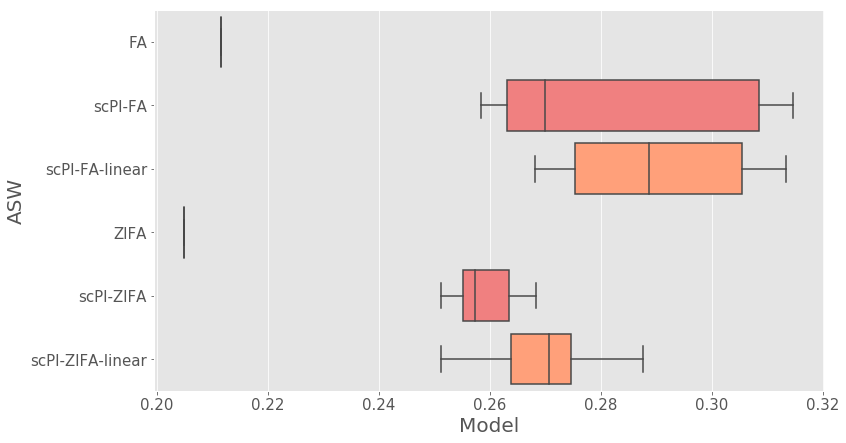

In [25]:
# ASW
model = models_plot
score = list("ASW" for _ in range(len(asw_plot)))
value = asw_plot
d = {'model': model, 'score': score, 'value': value}
df = pd.DataFrame(data=d)
fig, ax = plt.subplots(figsize=(12, 7))
sns.boxplot(y="model", x="value", data=df)
ax.artists[0].set_facecolor('tab:red')
ax.artists[1].set_facecolor('lightcoral')
ax.artists[2].set_facecolor('lightsalmon')
ax.artists[3].set_facecolor('tab:red')
ax.artists[4].set_facecolor('lightcoral')
ax.artists[5].set_facecolor('lightsalmon')
plt.xlabel('Model', fontsize=20)
plt.ylabel('ASW', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text yticklabel objects>)

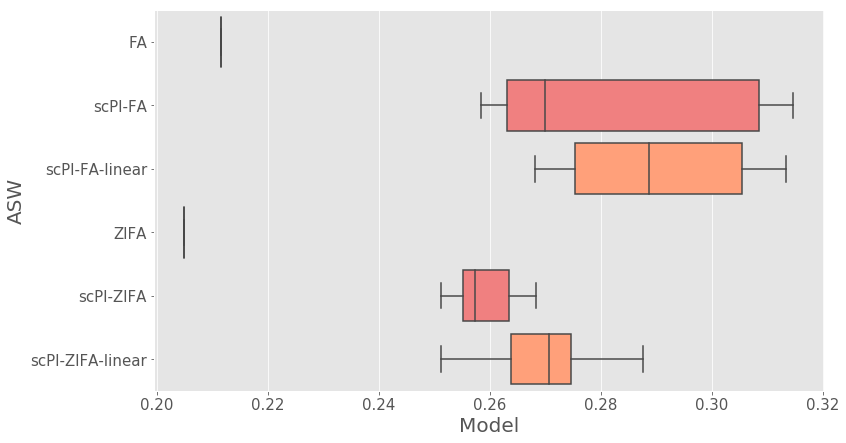

In [27]:
# ASW
model = models_plot
score = list("ASW" for _ in range(len(asw_plot)))
value = asw_plot
d = {'model': model, 'score': score, 'value': value}
df = pd.DataFrame(data=d)
fig, ax = plt.subplots(figsize=(12, 7))
sns.boxplot(y="model", x="value", data=df)
ax.artists[0].set_facecolor('tab:red')
ax.artists[1].set_facecolor('lightcoral')
ax.artists[2].set_facecolor('lightsalmon')
ax.artists[3].set_facecolor('tab:red')
ax.artists[4].set_facecolor('lightcoral')
ax.artists[5].set_facecolor('lightsalmon')
plt.xlabel('Model', fontsize=20)
plt.ylabel('ASW', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text yticklabel objects>)

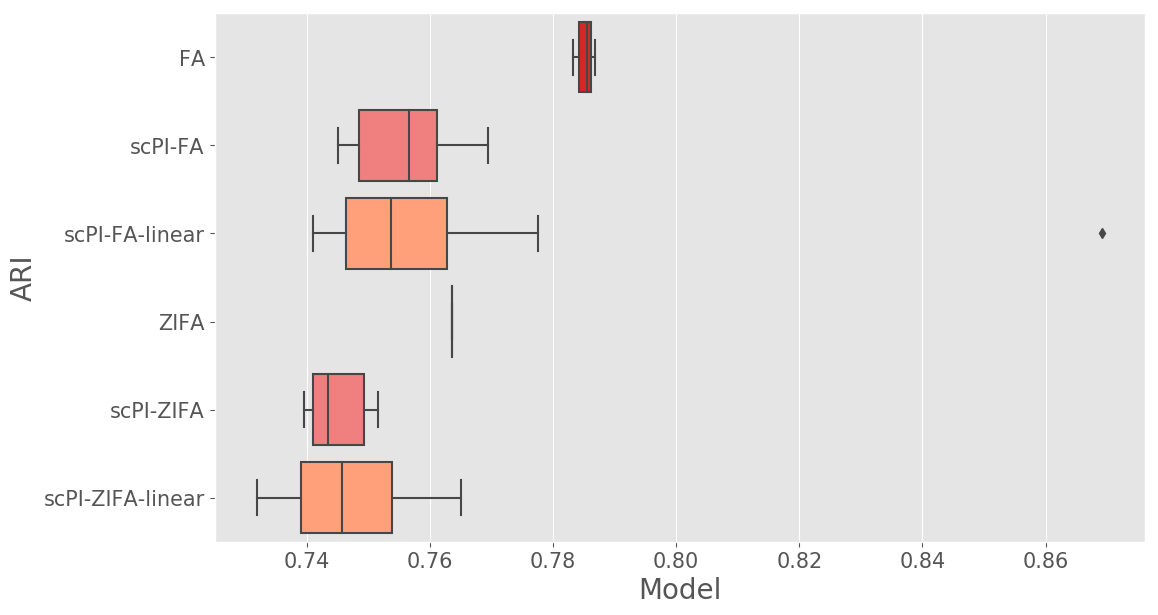

In [28]:
# ARI
model = models_plot
score = list("ARI" for _ in range(len(asw_plot)))
value = ari_plot
d = {'model': model, 'score': score, 'value': value}
df = pd.DataFrame(data=d)
fig, ax = plt.subplots(figsize=(12, 7), dpi=100)
sns.boxplot(y="model", x="value", data=df)
ax.artists[0].set_facecolor('tab:red')
ax.artists[1].set_facecolor('lightcoral')
ax.artists[2].set_facecolor('lightsalmon')
ax.artists[3].set_facecolor('tab:red')
ax.artists[4].set_facecolor('lightcoral')
ax.artists[5].set_facecolor('lightsalmon')
plt.xlabel('Model', fontsize=20)
plt.ylabel('ARI', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)